In [130]:
import wfdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.signal import detrend
import seaborn as sns
from scipy import fftpack

from __future__ import print_function, division
from numpy import *
%matplotlib notebook

import audio.wave as wave
from audio.filters import *
from audio.fourier import *
sns.set_style("dark")
import audio.index

In [131]:
def read(file):
    '''
    read a .hea file and convert it to a dataframe
    '''
    w = wfdb.rdsamp(file)
    return(pd.DataFrame(data=w[0], columns=w[1]['sig_name']))

In [132]:
############
### data ###
############

w = wfdb.rdsamp('Data/s9_walk') # acces to a specific file from Physionet
freq = w[1]['fs'] # header acces to frequency sampling
df = pd.DataFrame(data=w[0], columns=w[1]['sig_name']) # convert the data into Pandas DataFrame
data = df.chest_ecg.values
t = np.linspace(0, np.shape(data)[0] / freq, np.shape(data)[0])
 
#######################
### removing trends ###
#######################

no_trend_data = detrend(data) # remove linear trend

############
### plot ###
############

#plt.figure(figsize=(10, 7))
#plt.subplot(1, 3, 1)
#plt.plot(t, data)
#plt.title("Raw data")
#plt.subplot(1, 2, 2)
#plt.plot(t, no_trend_data)
#plt.title("No trend data")

In [133]:
data.min()

-1475.334439800836

In [134]:
w = wfdb.rdsamp('Data/s9_walk') # acces to a specific file from Physionet
freq = w[1]['fs']
df = pd.DataFrame(data=w[0], columns=w[1]['sig_name'])
dt = 1/freq
#t = r_[0.:3.0:dt]
x= df.chest_ecg.values
#x= x/amax(x)

In [135]:
np.shape(x)[0]

56321

<IPython.core.display.Javascript object>


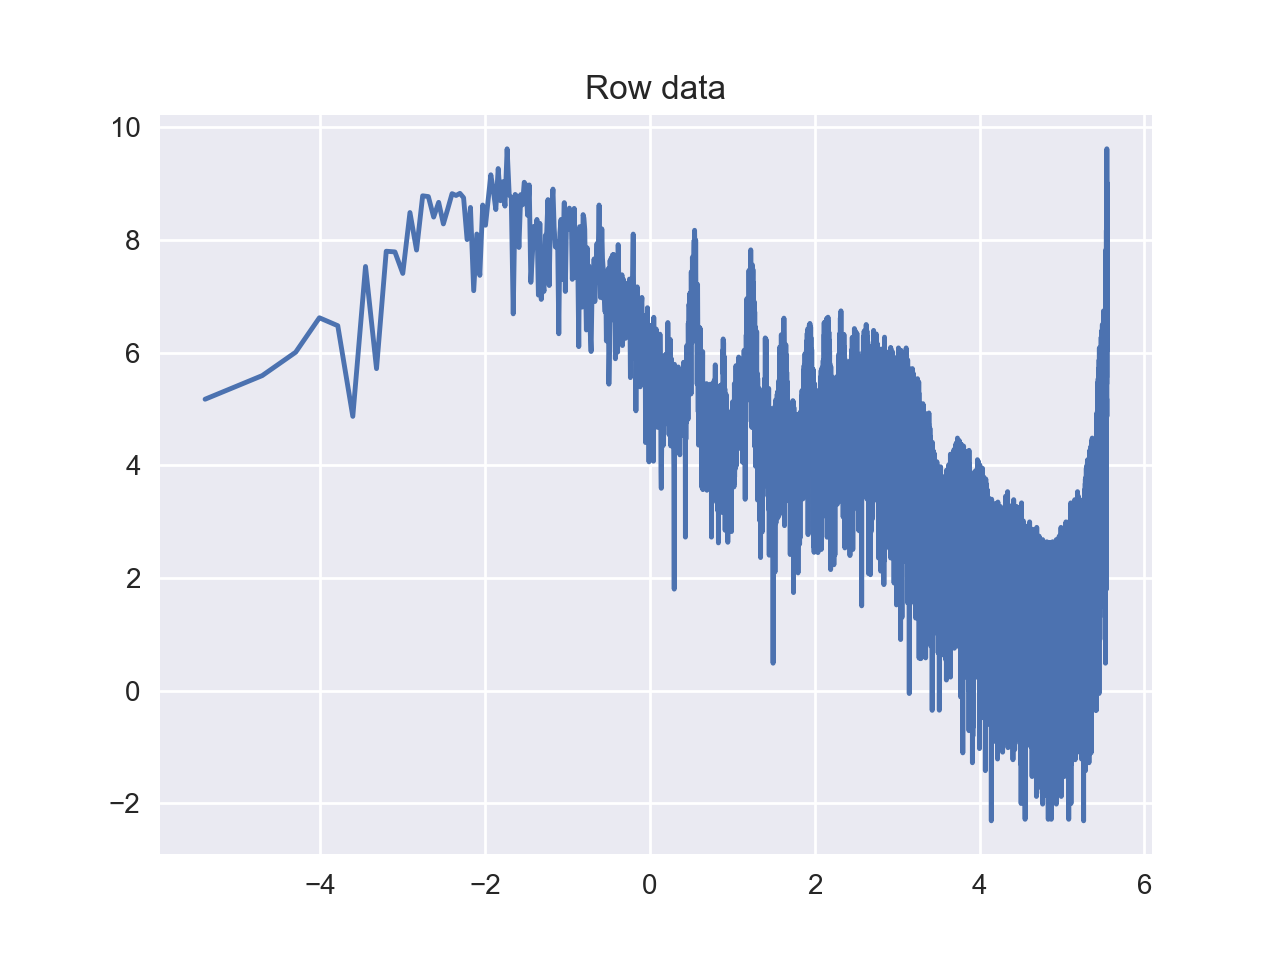

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [136]:
plt.figure()
Fx = F(x, dt=dt, power_of_two=True)
f = r_[0.0:freq: freq/np.shape(x)[0]]
plt.plot(np.log(f), np.log(abs(Fx(f))))
plt.title ('Row data')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


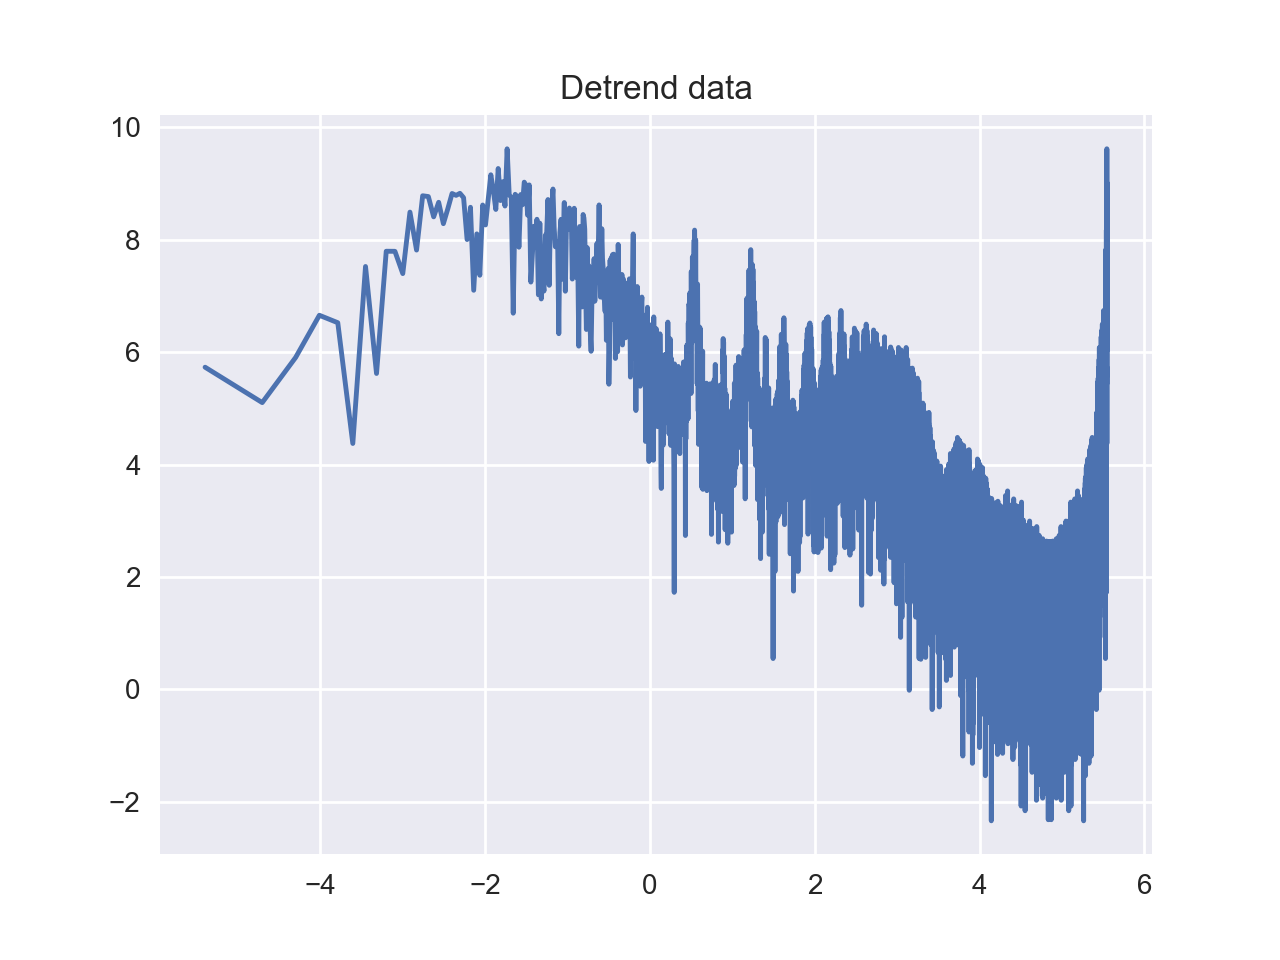

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [137]:
plt.figure()
F_detrend = F(no_trend_data, dt=dt, power_of_two=True)
f = r_[0.0:freq: freq/np.shape(x)[0]]
plt.plot(np.log(f), np.log(abs(F_detrend(f))))
plt.title ('Detrend data')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


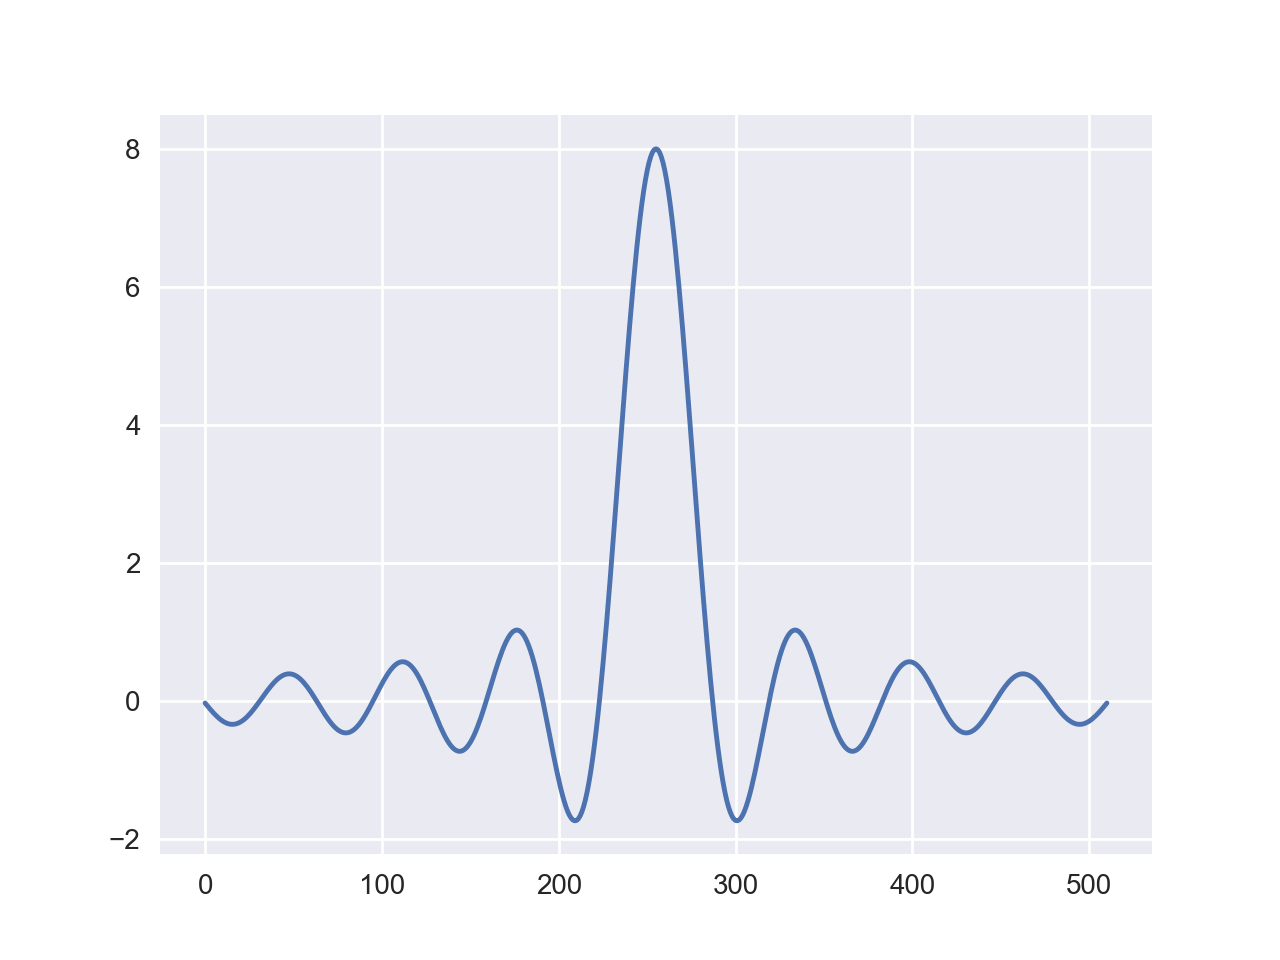

In [138]:
fc = 4
h = low_pass(fc, dt)
n = 511
hn = h(n)
plt.figure()
plt.plot(hn)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


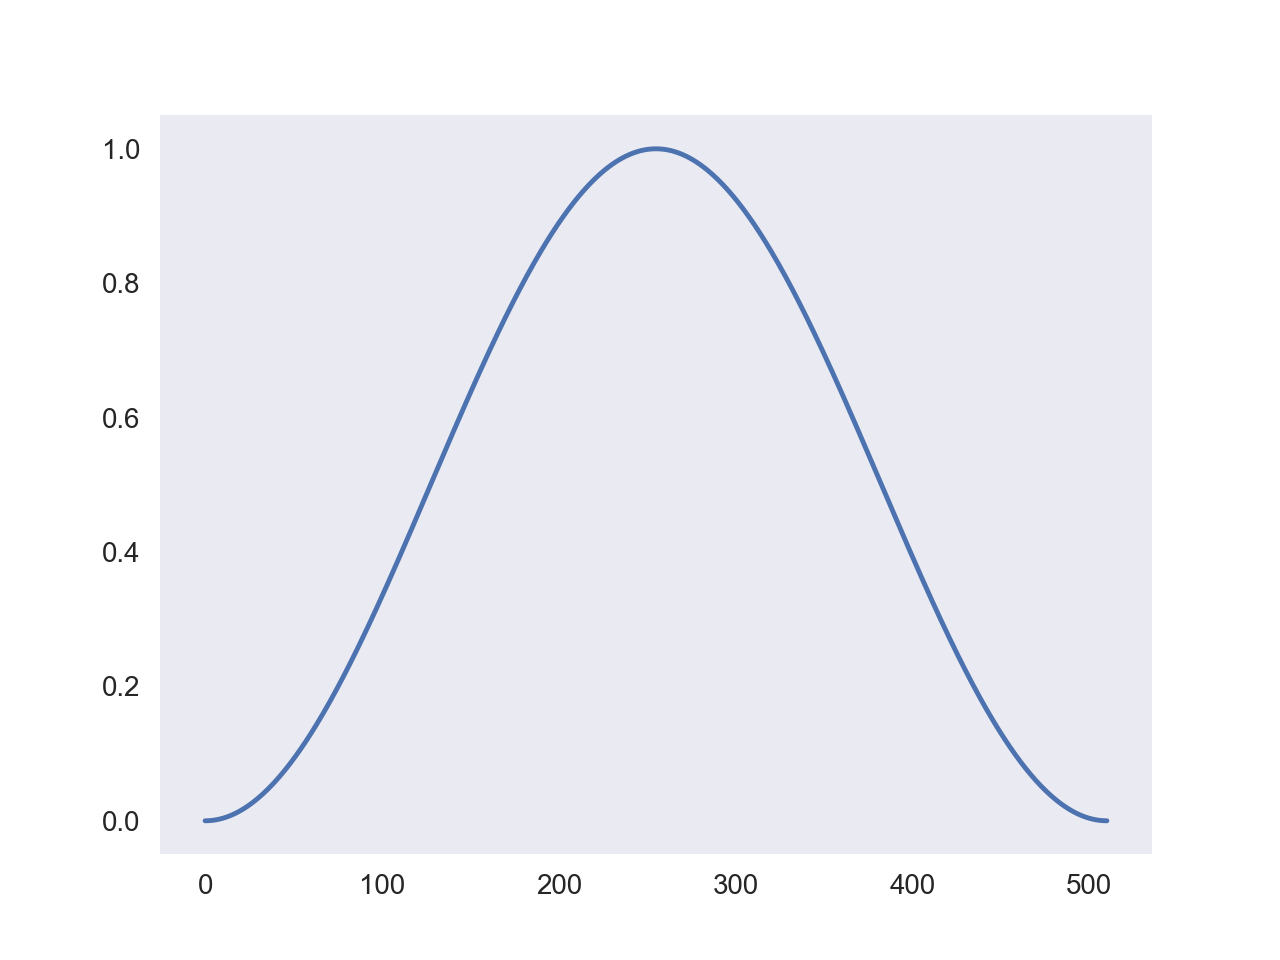

In [139]:
plt.figure()
w = hanning(511)
plt.plot(w)
plt.show()

<IPython.core.display.Javascript object>


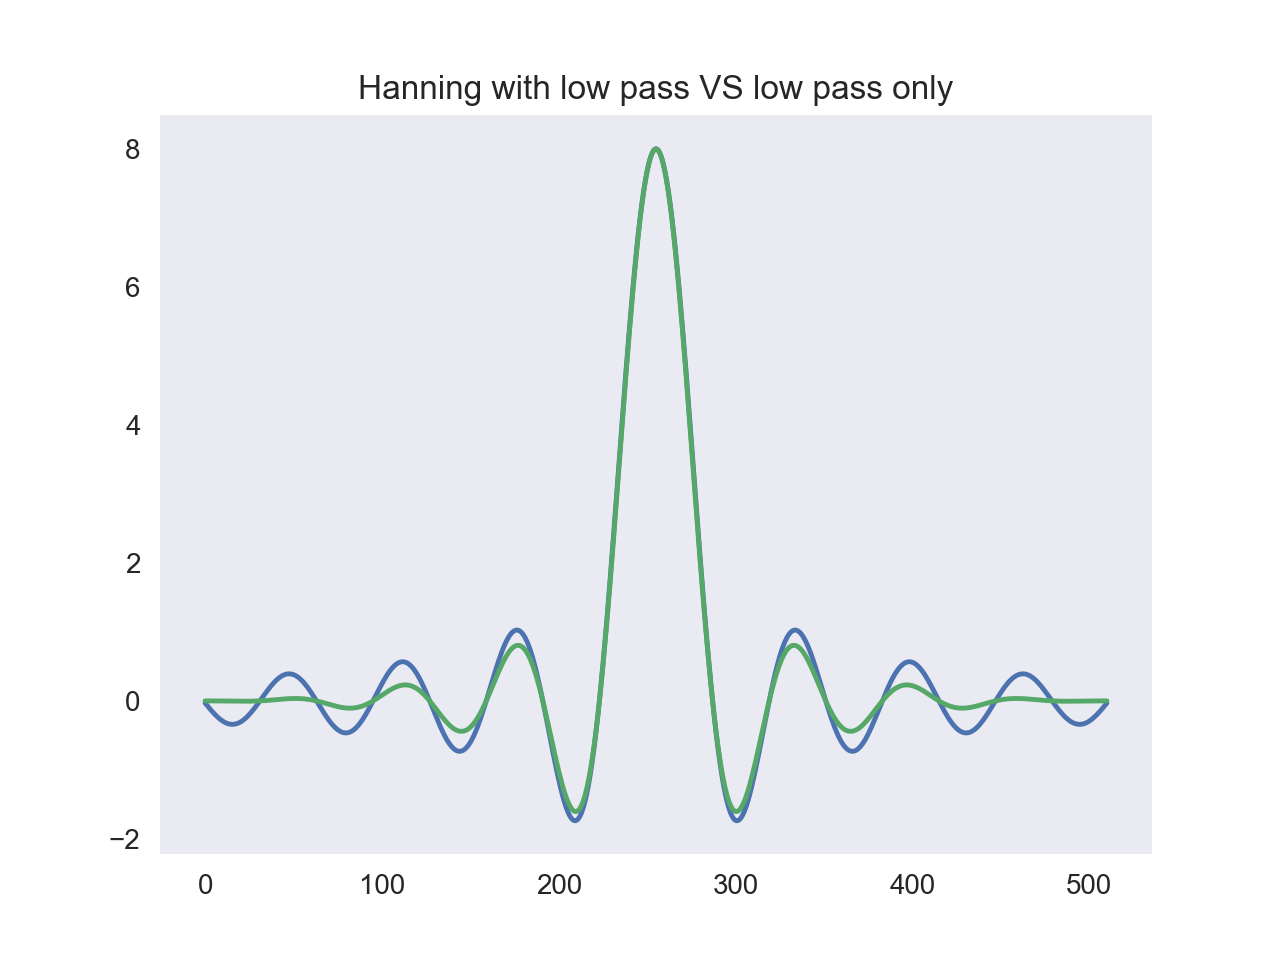

In [140]:
plt.figure()
plt.plot(hn)
plt.plot(hn * w)
plt.title( 'Hanning with low pass VS low pass only' )
plt.show()

<IPython.core.display.Javascript object>


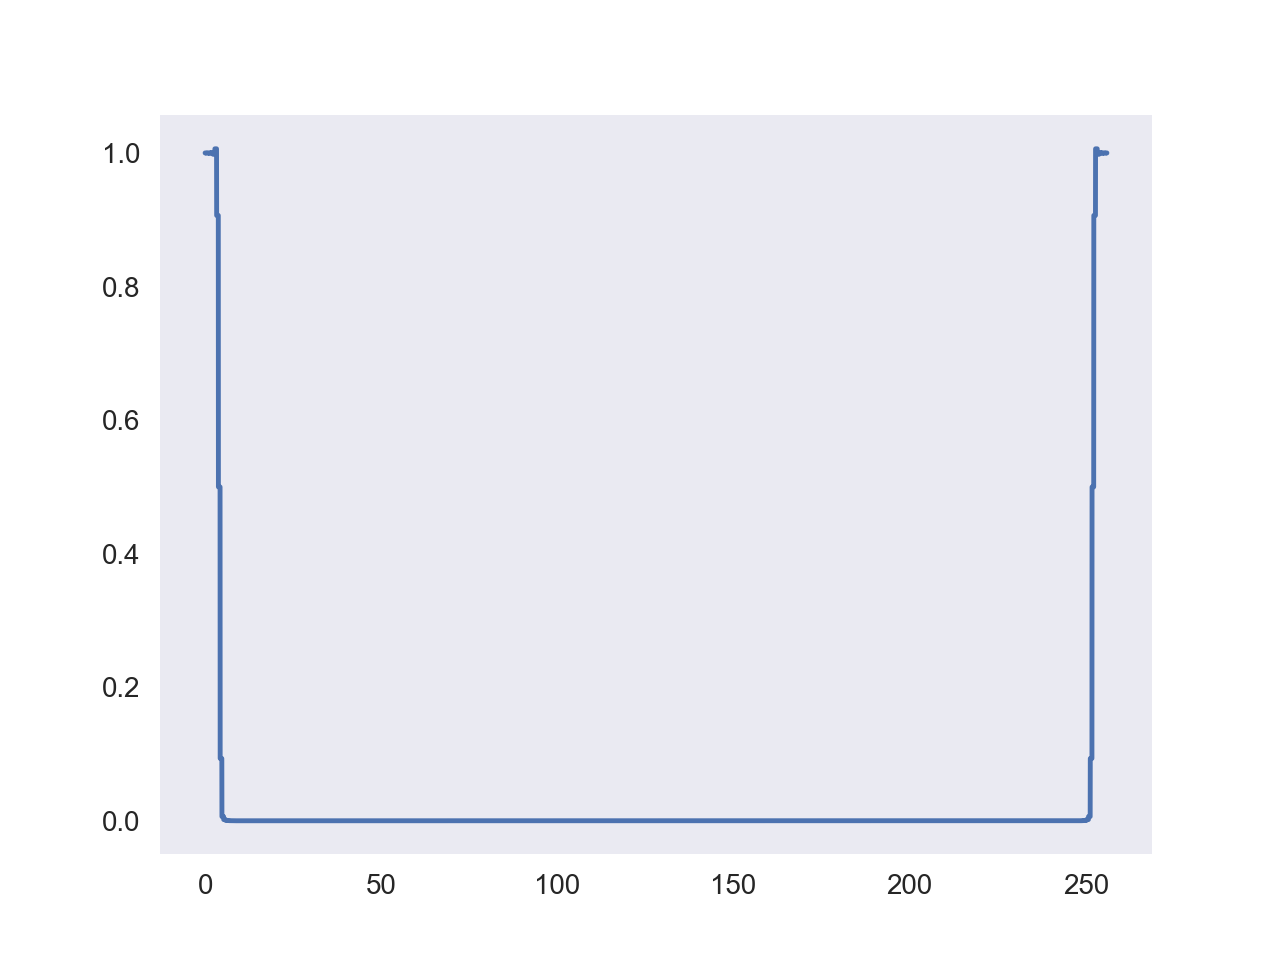

In [141]:
plt.figure()
Fhn = F(hn*w, dt=dt, power_of_two=True)
f = r_[0.0:freq: freq/np.shape(x)[0]]
plt.plot(f, abs(Fhn(f)))
plt.show()

<IPython.core.display.Javascript object>


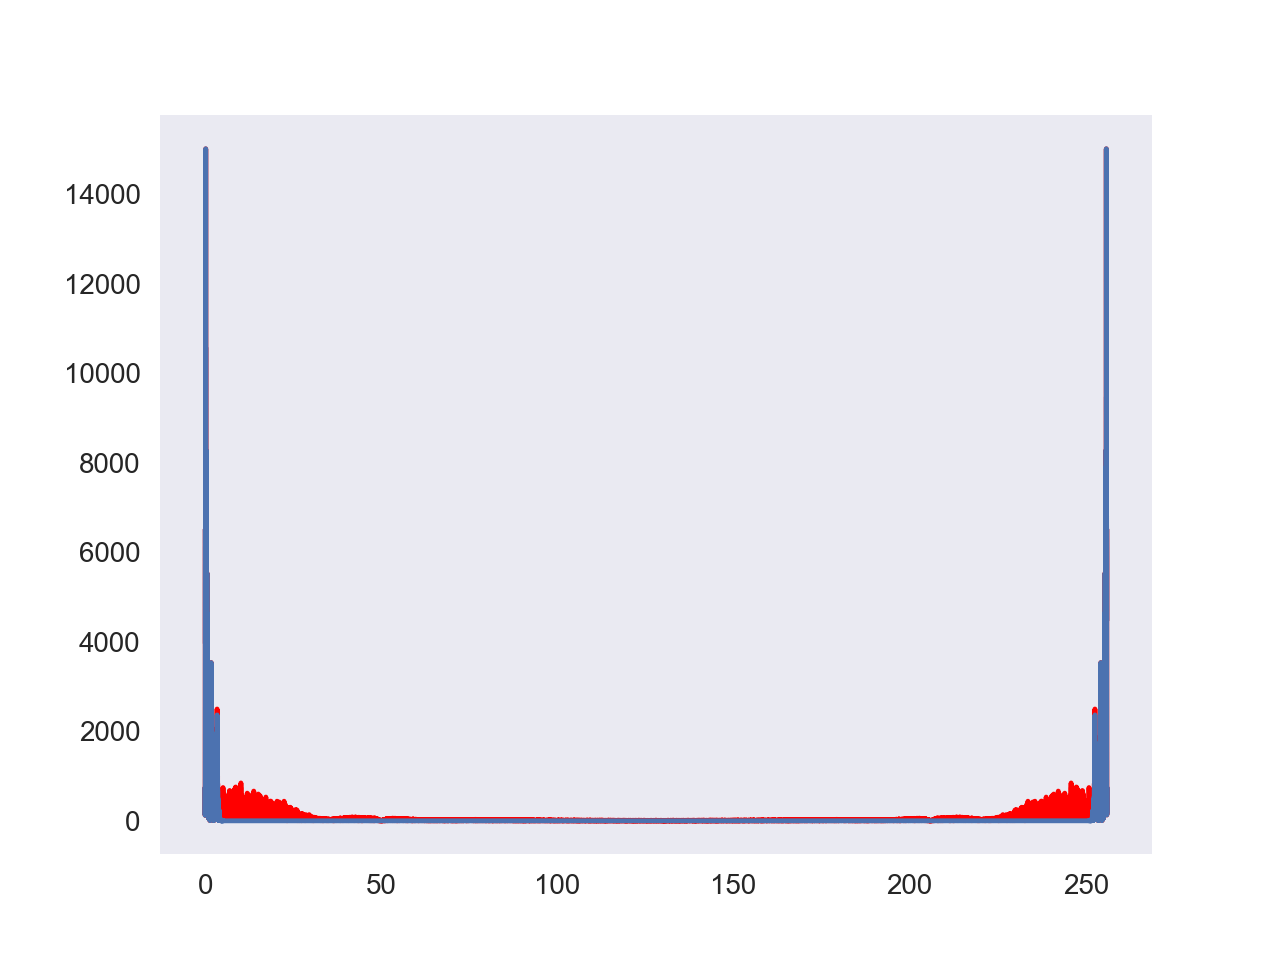

In [142]:
xf = dt*convolve(x, hn*w)
plt.figure()
Fxf = F(xf, dt=dt, power_of_two=True)
f = r_[0.0:freq: freq/np.shape(x)[0]]
plt.plot(f, abs(Fx(f)), "r")
plt.plot(f, abs(Fxf(f)))
plt.show()

## Using Louis 's filter

In [143]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz


<IPython.core.display.Javascript object>


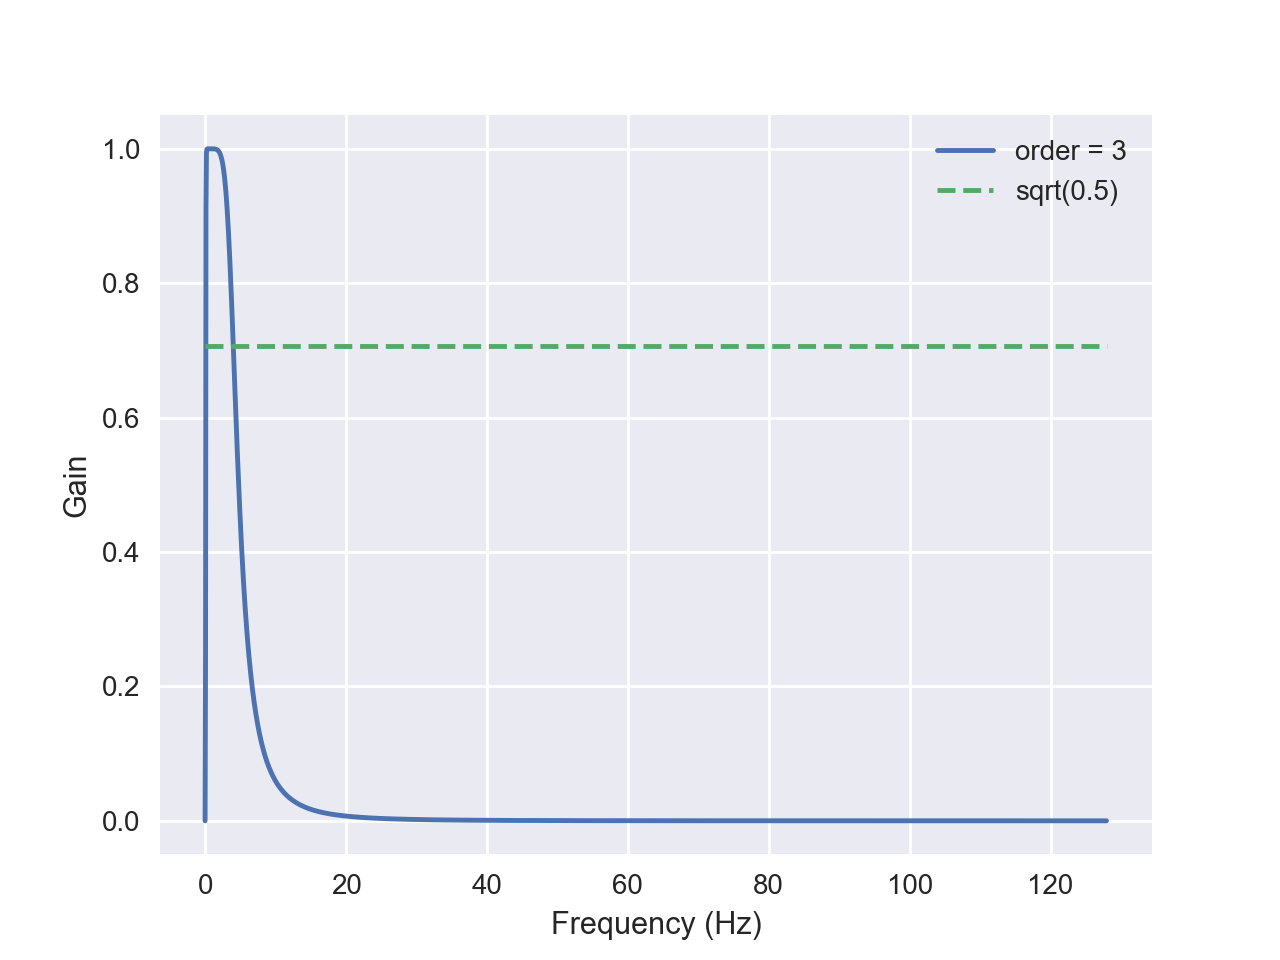

<IPython.core.display.Javascript object>


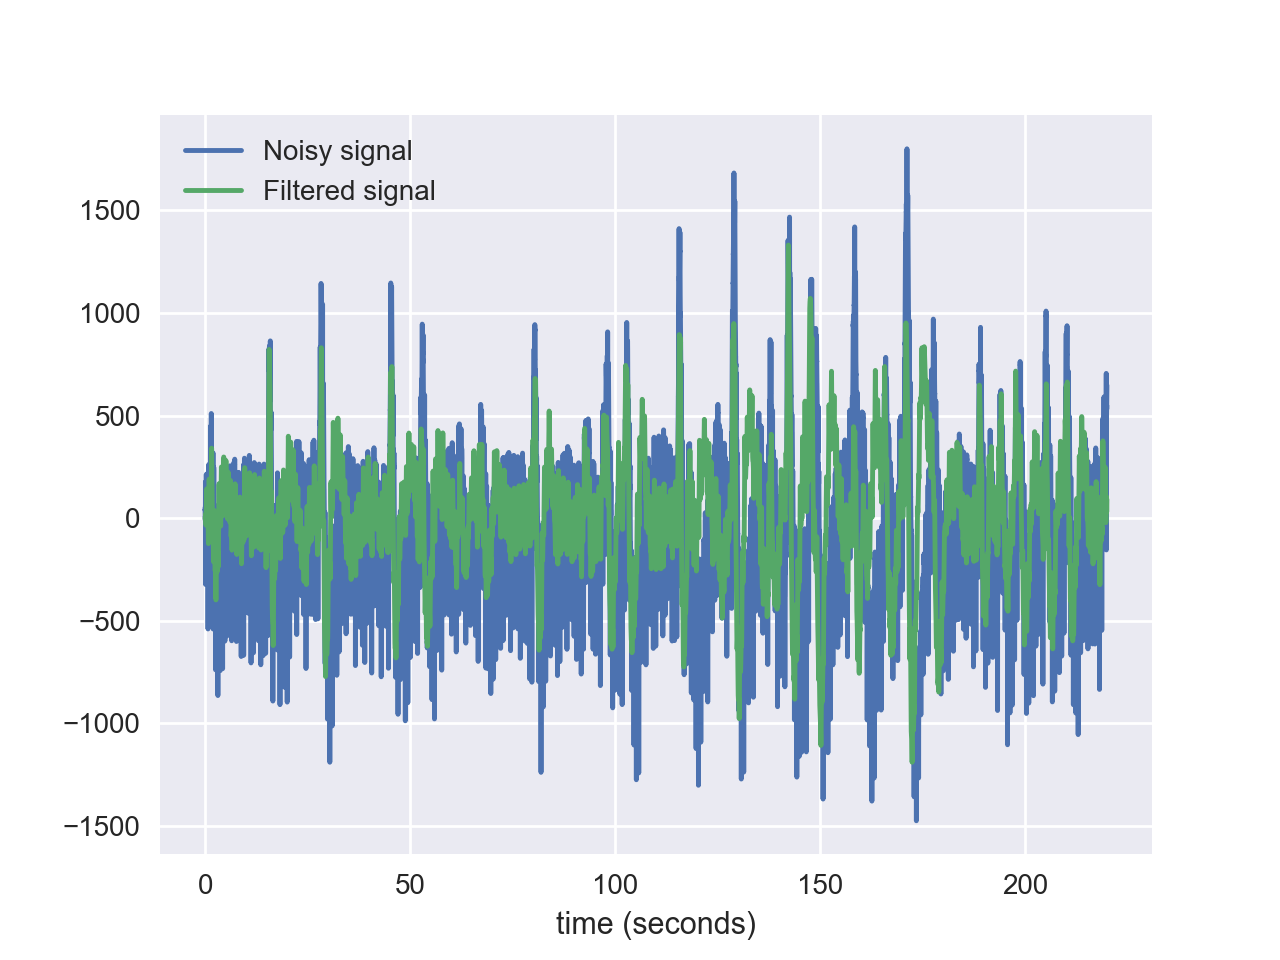

In [161]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 256
lowcut = 0.1
highcut = 4
# Plot the frequency response for a few different orders.
plt.figure()
plt.clf()
for order in [3]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

# Filter a noisy signal.
x = data
t = np.linspace(0, np.shape(data)[0] / freq, np.shape(data)[0])
#x = np.reshape(x, (1, len(x)))
T = len(t) * freq
#t = np.reshape(t, (1, len(t)))

plt.figure()
plt.clf()
plt.plot(t, x, label='Noisy signal')

y = butter_bandpass_filter(x, lowcut, highcut, fs, order=3)
plt.plot(t, y, label='Filtered signal')
plt.xlabel('time (seconds)')
#plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


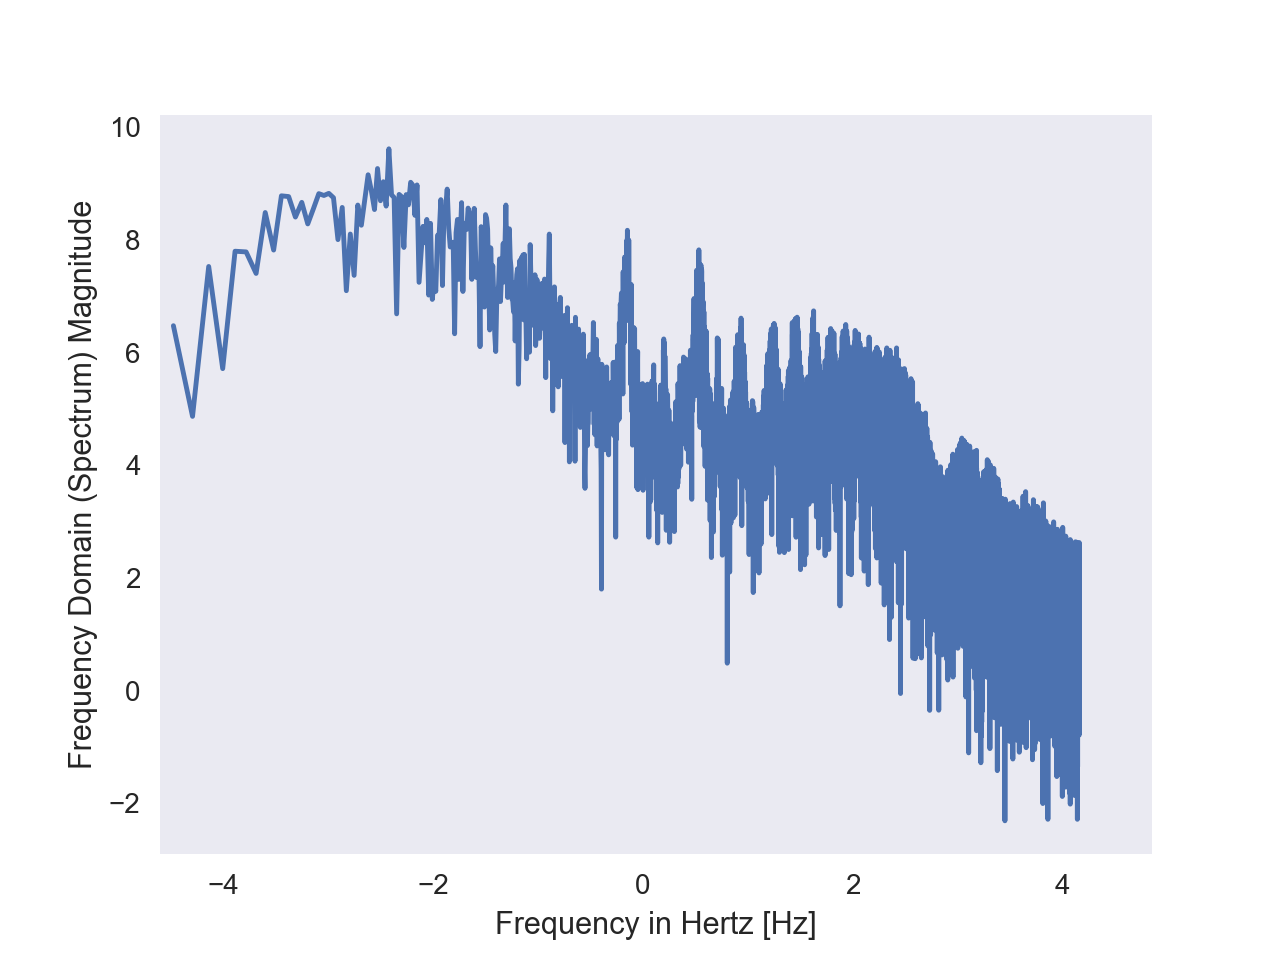

(-4.6051701859880909, 4.8520302639196169)

In [145]:
#########################
### fourier transform ###
#########################

windows_freq_min = 0.01 # in Hz
windows_freq_max = freq / 2 # in Hz

f_s = 256
x = Fx(y)
X = x
freqs = fftfreq(len(x)) * f_s
df_temp = pd.DataFrame(data={'freqs': freqs, 'abs(X)': np.abs(X)})
df_temp = pd.DataFrame(data={'freqs': freqs/2.0, 'abs(X)': Fx(f)})
df_temp = df_temp[(windows_freq_min <= df_temp.freqs) & (df_temp.freqs <= windows_freq_max)]

fig, ax = plt.subplots()
ax.plot(np.log(df_temp.freqs), np.log(df_temp['abs(X)']))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(np.log(windows_freq_min), np.log(windows_freq_max))
#ax.set_ylim(-5, 110)

In [153]:
data_frame=pd.DataFrame(data={'raw_fourier':Fx(f),'yanis_fourier':Fxf(f),'louis_fourier':X})


<IPython.core.display.Javascript object>


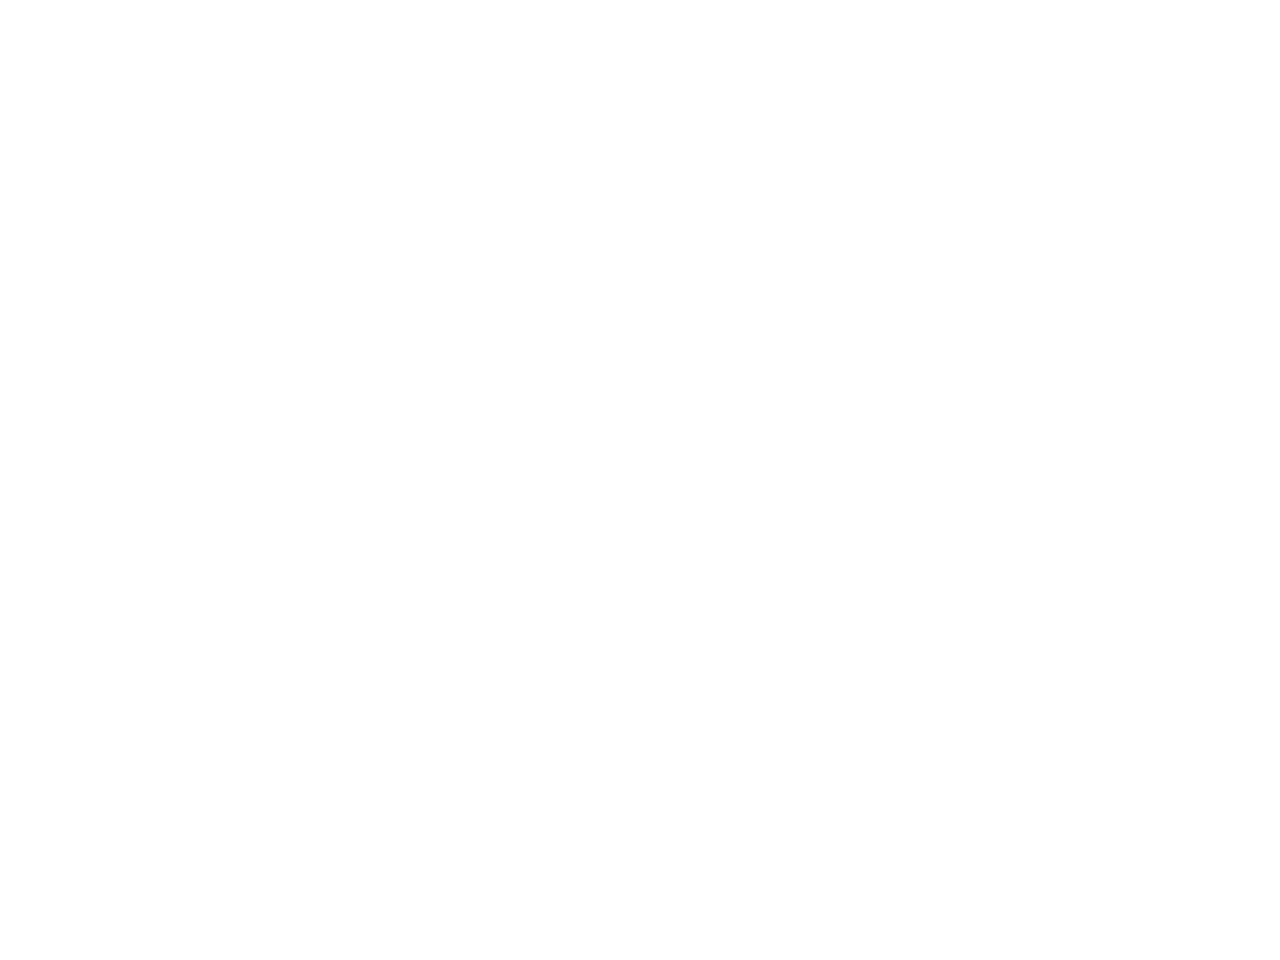

<IPython.core.display.Javascript object>


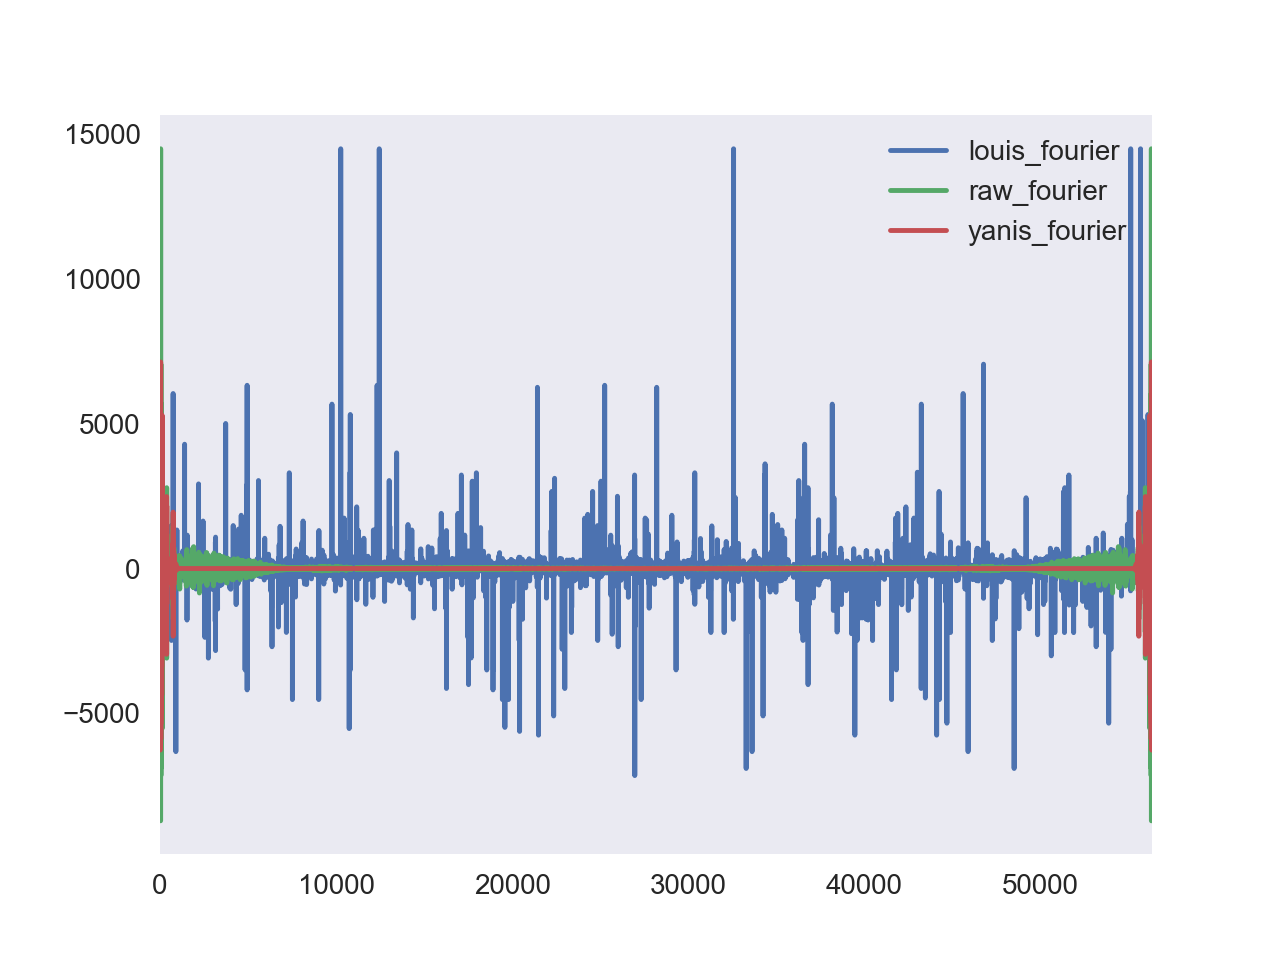

In [155]:
plt.figure()
data_frame.plot(kind='line')
plt.show()

In [148]:
help(F)

Help on function F in module audio.fourier:

F(x, **kwargs)
    Computes the Fourier transform of the object `x`.
    
    If the argument `x` is a numpy array, its spectral representation 
    is the Discrete-Time Fourier Transform (DTFT), 
    the function of the frequency $f$ given by:
    
    $$
    x(f) = \Delta t \sum_{j=0}^{n_x-1} x_n \exp(-2 i \pi f j \Delta t)
    $$
    
    Otherwise, the spectral representation depends on the object type.
    
    Arguments
    ---------
    `x:`
      : the object to transform, either a `numpy.ndarray` (1-dim.) or an object 
        that implements the Fourier protocol -- roughly speaking, that has a
        Fourier transform method `__F__`. 
        
    The extra arguments in `kwargs` are dependent of the object type.
    For numpy arrays, they are:
    
    `dt:`
      : sampling time, type `float`, defaults to `1.0`.
    
    `n:`
      : minimal number of points used in spectrum estimation; type `int`, 
        defaults to `None`.
  

In [150]:
help(sns)

Help on package seaborn:

NAME
    seaborn - # Capture the original matplotlib rcParams

FILE
    /anaconda/lib/python2.7/site-packages/seaborn/__init__.py

PACKAGE CONTENTS
    algorithms
    apionly
    axisgrid
    categorical
    crayons
    distributions
    external (package)
    linearmodels
    matrix
    miscplot
    palettes
    rcmod
    tests (package)
    timeseries
    utils
    widgets
    xkcd_rgb

DATA
    __version__ = '0.7.1'
    crayons = {'Almond': '#EFDECD', 'Antique Brass': '#CD9575', 'Apricot':...
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 8192...
    xkcd_rgb = {'acid green': '#8ffe09', 'adobe': '#bd6c48', 'algae': '#54...

VERSION
    0.7.1


